In [1]:
from common import *

/home/ec2-user/anaconda3/lib/python3.6/site-packages/pandas/core/common.py:701: RuntimeWarning: divide by zero encountered in log
  return func(obj, *args, **kwargs)


In [2]:
n = 1000

def y(y0):
    y = [y0]
    for i in range(1, n):
        try:
            y.append(math.sqrt(2 * y[-1] - 1) / y[-1])
        except ValueError:
            break
    return np.array(y)

In [41]:
r = .543689012692076

In [36]:
y(.543689012692076)

array([ 0.54368901,  0.54368901,  0.54368901,  0.54368901,  0.54368901,
        0.54368901,  0.54368901,  0.54368901,  0.54368901,  0.54368901,
        0.54368901,  0.54368899,  0.54368887,  0.54368828,  0.54368517,
        0.54366895,  0.54358424,  0.54314139,  0.54081555,  0.5282976 ,
        0.45030955])

In [45]:
(1-r)

0.45631098730792397

# Randoms

In [123]:
eps = np.finfo(float).eps

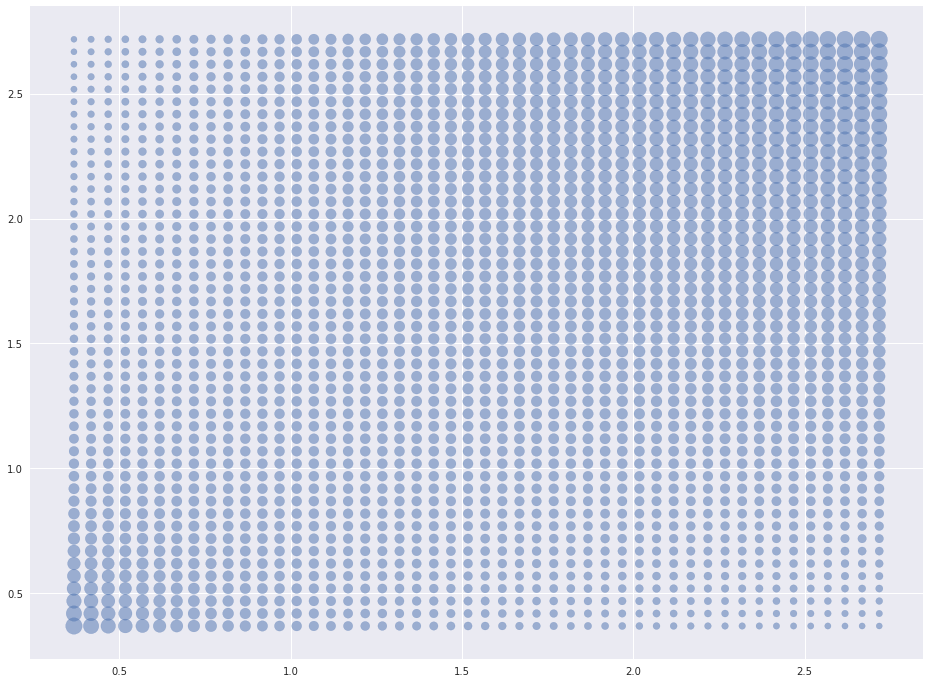

In [187]:
x = np.arange(1/np.e, np.e, 0.05)
y = np.arange(1/np.e, np.e, 0.05)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.exp(np.log(xx) * np.log(yy))
z = pd.DataFrame(z, index=x, columns=y).rename_axis('x').rename_axis('y', axis=1)
z = z.reset_index()
z = z.melt(id_vars='x', value_name='z')
plt.scatter(z.x, z.y, s=z.z*100, alpha=.5);

# styles and color

In [14]:
/print plt.style.available

['seaborn-pastel', 'seaborn', 'seaborn-deep', 'seaborn-ticks', 'grayscale', 'seaborn-dark-palette', 'seaborn-bright', 'fivethirtyeight', 'dark_background', 'seaborn-colorblind', 'seaborn-whitegrid', '_classic_test', 'seaborn-paper', 'seaborn-poster', 'ggplot', 'seaborn-dark', 'bmh', 'seaborn-darkgrid', 'seaborn-talk', 'seaborn-white', 'classic', 'seaborn-muted', 'seaborn-notebook']


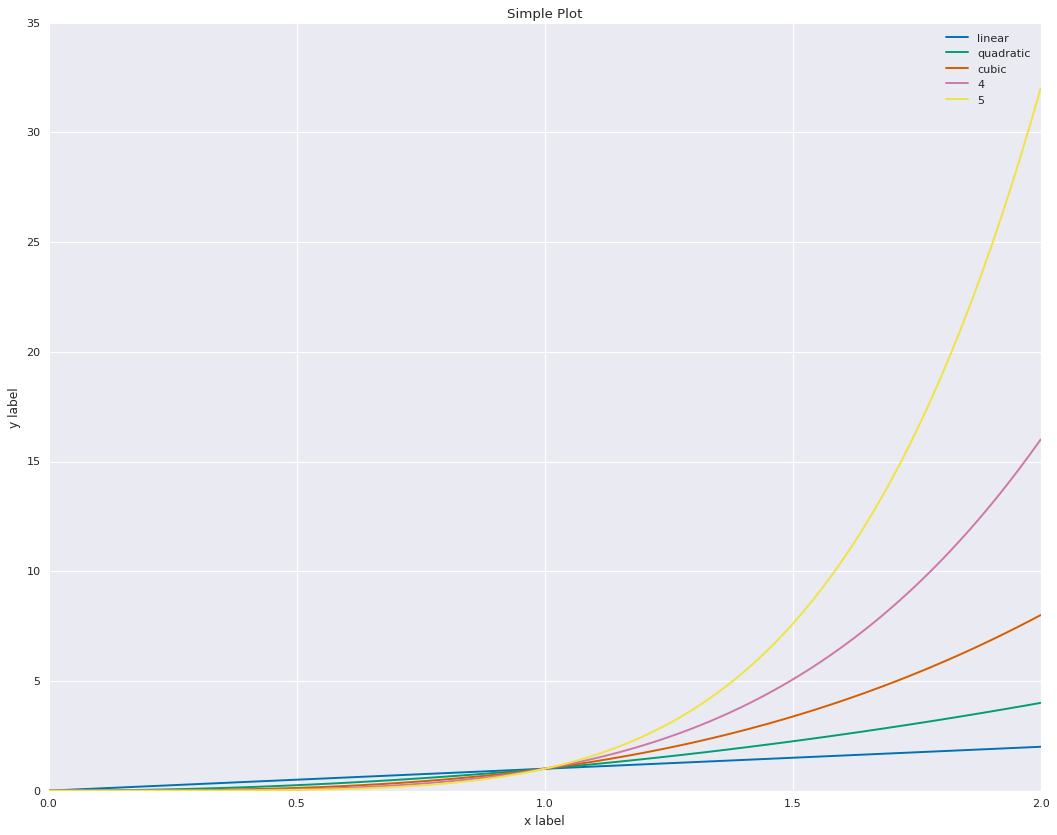

In [44]:

canvas(16, 12)
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.plot(x, x**4, label='4')
plt.plot(x, x**5, label='5')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

# linear regression and PCA and correlation

In [25]:
from common import *
from numpy.random import randn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression as LR
from scipy.stats import pearsonr
%matplotlib notebook
canvas(7, 7)

In [63]:
n = 1000
x = randn(n)
X = x[:, np.newaxis]
z = randn(n)

var_names = 'corr pval yxslope xyslope pcax pcay pcavar pcavarr'.split()
for v in var_names:
    globals()[v] = []
    
theta = np.arange(0, 2 * np.pi + 1e-5, np.pi / 2048)
for t in theta:
    y = np.sin(t) * z + np.cos(t) * x
    
    # correlation
    _corr, _pval = pearsonr(x, y)
    
    # y~x regression
    lr = LR(fit_intercept=False)
    lr.fit(X, y)
    _yxslope = lr.coef_[0]
    
    # x~y regression
    lr = LR(fit_intercept=False)
    lr.fit(y[:, np.newaxis], x)
    _xyslope = lr.coef_[0]
    
    # PCA
    pca = PCA(n_components=1)
    pca.fit(np.stack([x, y], axis=1))
    _pcax, _pcay = pca.components_[0]
    _pcavar = pca.explained_variance_[0]
    _pcavarr = pca.explained_variance_ratio_[0]
    
    for v in var_names:
        _v = '_' + v
        globals()[v] += [locals()['_' + v]]
        
for v in var_names:
    globals()[v] = np.asarray(globals()[v])
data = pd.DataFrame({k: v for k, v in globals().items() if k in var_names}, index=theta)
data.index.name = 'theta'

In [64]:
raise Stop()
data0 = data.copy()

In [65]:
data['yxangle'] = np.arctan(data.yxslope)
data['xyangle'] = np.arctan(1 / data.xyslope)
data['pcaangle'] = np.arctan(data.pcay / data.pcax)

<IPython.core.display.Javascript object>


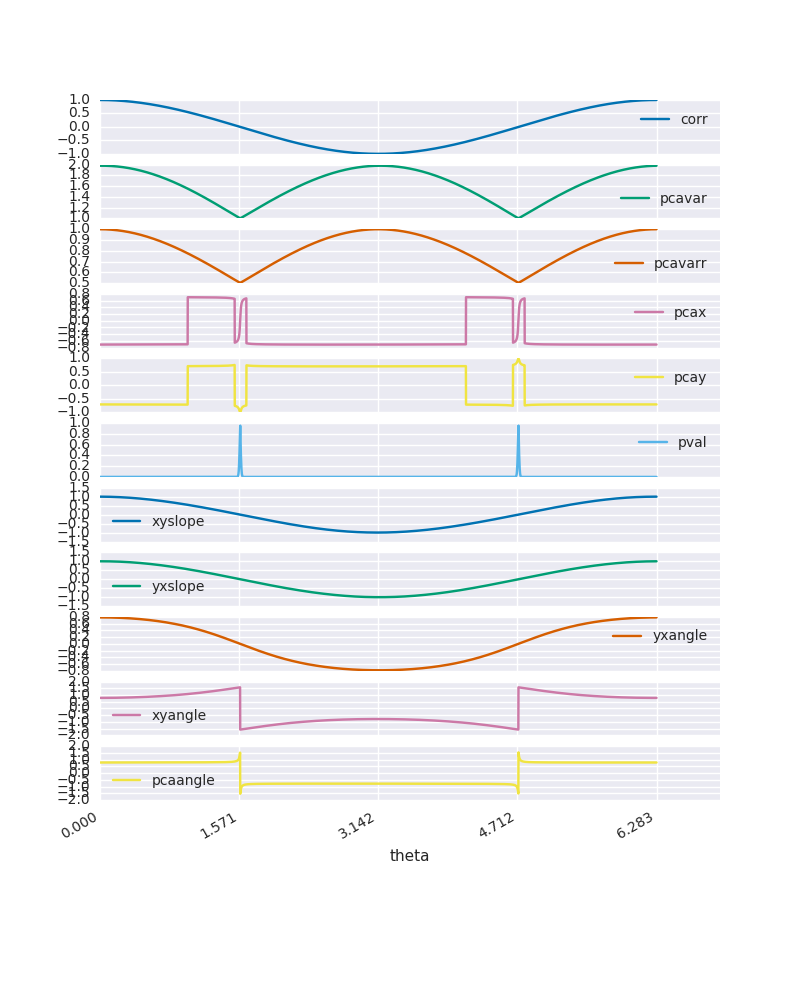

In [66]:
canvas(8, 10)
data.plot(subplots=True, xticks=np.arange(0, 2 * np.pi + 1e-15, np.pi / 2));
canvas(7, 7)

<IPython.core.display.Javascript object>


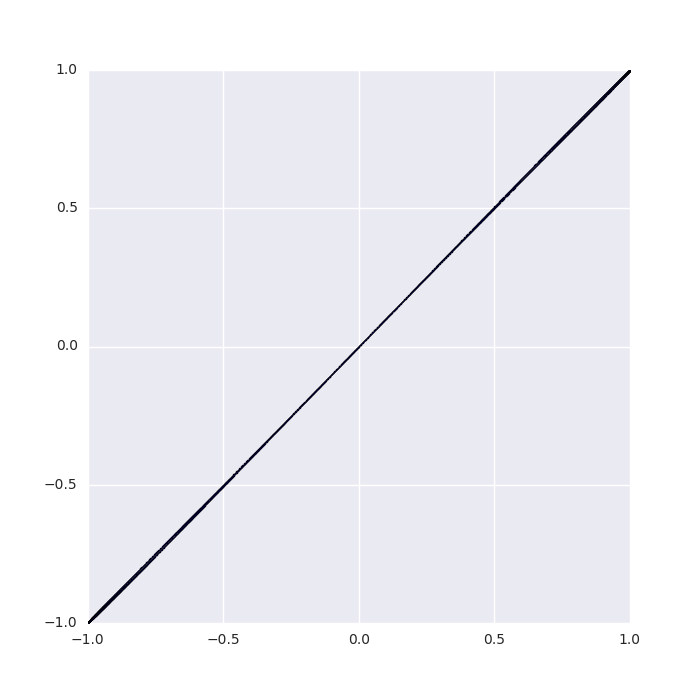

In [90]:
plt.scatter('xyslope', 'corr', data=data, s=.5);
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

<IPython.core.display.Javascript object>


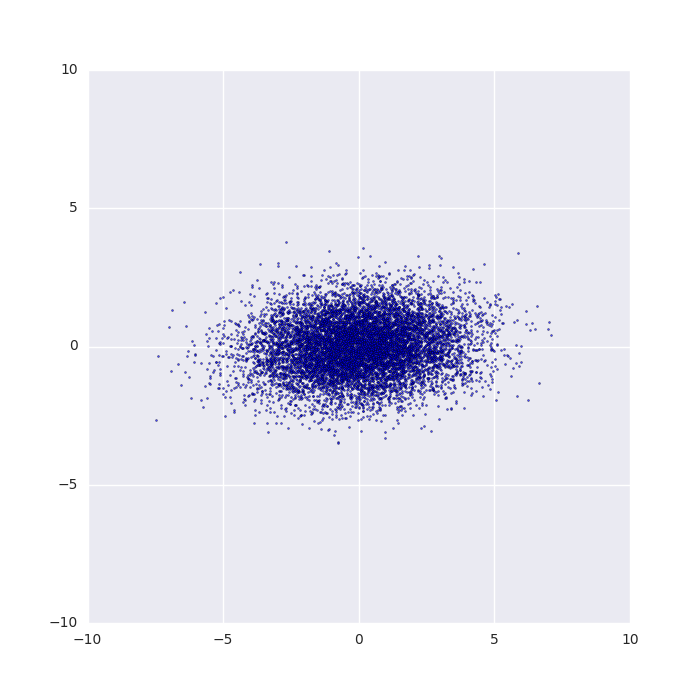

In [106]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

xscale = 2
yscale = 1
scale = max(xscale, yscale)

t = 0
y = np.sin(t) * z + np.cos(t) * x
scat = ax.scatter(x * 0 + 100, y * 0 + 100, s=2, alpha=.7)
ax.set_xlim(-5 * scale, 5 * scale)
ax.set_ylim(-5 * scale, 5 * scale)

def init():  # only required for blitting to give a clean slate.
    scat.set_offsets([[np.nan, np.nan] for i in range(x.shape[0])])
    return scat,

theta1 = np.arange(-np.pi / 2, 100.5 * np.pi + 1e-5, np.pi / 2048)
def animate(i):
    t = theta1[i]
    y = np.sin(t) * z + np.cos(t) * x
    scat.set_offsets(np.stack([x * xscale, y * yscale], axis=1))  # update the data.
    return scat,

ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50, repeat=True, repeat_delay=0)

plt.show()

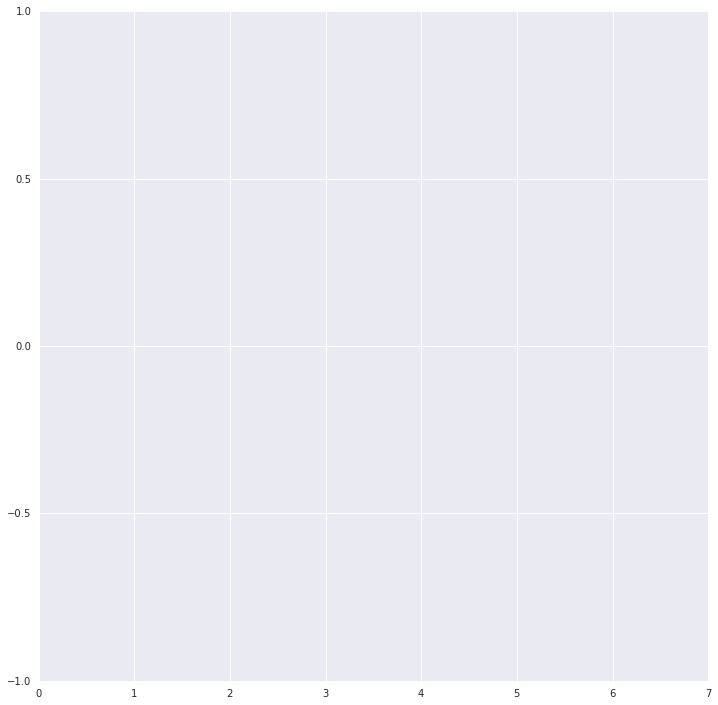

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 100))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

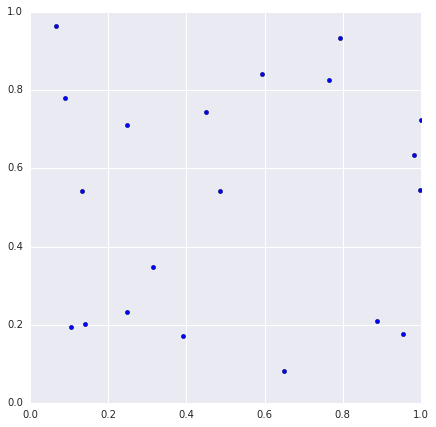

In [66]:
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
import numpy as np

dt = 0.005
n=20
L = 1
particles=np.zeros(n,dtype=[("position", float , 2),
                            ("velocity", float ,2),
                            ("force", float ,2),
                            ("size", float , 1)])

particles["position"]=np.random.uniform(0,L,(n,2));
particles["velocity"]=np.zeros((n,2));
particles["size"]=0.5*np.ones(n);

fig = plt.figure(figsize=(7,7))
ax = plt.axes(xlim=(0,L),ylim=(0,L))
scatter=ax.scatter(particles["position"][:,0], particles["position"][:,1])

def update(frame_number):
    particles["force"]=np.random.uniform(-2,2.,(n,2));
    particles["velocity"] = particles["velocity"] + particles["force"]*dt
    particles["position"] = particles["position"] + particles["velocity"]*dt

    particles["position"] = particles["position"]%L
    scatter.set_offsets(particles["position"])
    return scatter, 

anim = FuncAnimation(fig, update, interval=10)
plt.show() 

<IPython.core.display.Javascript object>


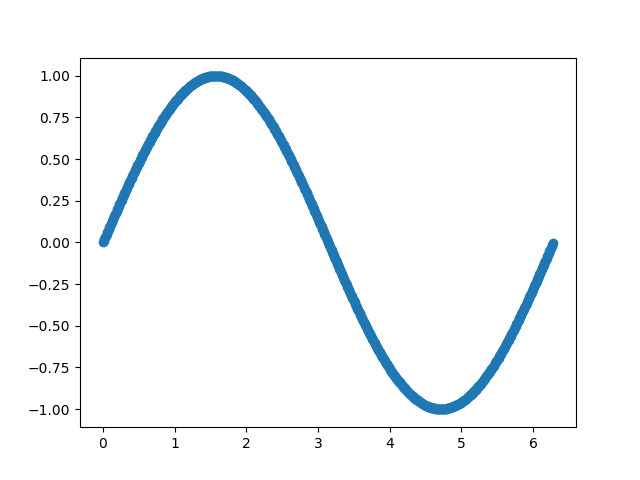

In [51]:
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
dots = ax.scatter(x, np.sin(x))

In [52]:
dots.get_offsets().shape

(629, 2)